In [2]:
## merging all files into one master file (csv) for easy analysis

import pandas as pd

files = [
    ("RamaPlot 1-2 Zebra Fish.txt", "Zebrafish", "1-2"),
    ("RamaPlot 2-2.5 Zebra Fish.txt", "Zebrafish", "2-2.5"),
    ("RamaPlot 2.5+ Zebra Fish.txt", "Zebrafish", "2.5+"),
    ("RamaPlot 1-2 Rat.txt", "Rat", "1-2"),
    ("RamaPlot 2-2.5 Rat.txt", "Rat", "2-2.5"),
    ("RamaPlot 2.5+ Rat.txt", "Rat", "2.5+"),
    ("RamaPlot for 1-2 Human.txt", "Human", "1-2"),
    ("RamaPlot for 2-2.5 Human.txt", "Human", "2-2.5"),
    ("RamaPlot for 2.5+ Human.txt", "Human", "2.5+")
]

data = []

for file_name, species, resolution in files:
    with open(file_name, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue 
            # Expected format: "PDB: <id> | Average phi: <phi> | Average psi: <psi>"
            parts = line.split("|")
            try:
                pdb_id = parts[0].split(":")[1].strip()
                phi = float(parts[1].split(":")[1].strip())
                psi = float(parts[2].split(":")[1].strip())
                data.append({
                    "PDB": pdb_id,
                    "AveragePhi": phi,
                    "AveragePsi": psi,
                    "Species": species,
                    "Resolution": resolution
                })
            except (IndexError, ValueError) as e:
                print(f"Error processing line in {file_name}: {line}")
                continue

master_df = pd.DataFrame(data)

master_df.to_csv("master.csv", index=False)

print(master_df.head())

    PDB  AveragePhi  AveragePsi    Species Resolution
0  9EZ1  -65.670234   -2.393472  Zebrafish        1-2
1  9EZ2  -66.572262   -2.333679  Zebrafish        1-2
2  9GYA  -66.845104   -3.109599  Zebrafish        1-2
3  9GYJ  -64.917435   -4.229558  Zebrafish        1-2
4  4Q0A  -66.143859   -3.030663  Zebrafish        1-2


In [3]:
## EDA

import pandas as pd
import numpy as np
from scipy import stats

# ----------------------------
# 1. Statistical Summaries
# ----------------------------

# Summary statistics grouped by Species and Resolution
grouped_stats = master_df.groupby(['Species', 'Resolution'])[['AveragePhi', 'AveragePsi']].agg(['mean', 'median', 'std'])
print("Summary Statistics (by Species and Resolution):")
print(grouped_stats)

# Overall summary by Species only
species_stats = master_df.groupby('Species')[['AveragePhi', 'AveragePsi']].agg(['mean', 'median', 'std'])
print("\nOverall Summary Statistics by Species:")
print(species_stats)

# Overall summary by Resolution only
resolution_stats = master_df.groupby('Resolution')[['AveragePhi', 'AveragePsi']].agg(['mean', 'median', 'std'])
print("\nOverall Summary Statistics by Resolution:")
print(resolution_stats)

# ----------------------------
# 2. Correlation Analysis
# ----------------------------

# Overall correlation between AveragePhi and AveragePsi (Pearson and Spearman)
overall_pearson = master_df[['AveragePhi', 'AveragePsi']].corr(method='pearson')
overall_spearman = master_df[['AveragePhi', 'AveragePsi']].corr(method='spearman')
print("\nOverall Pearson Correlation between Phi and Psi:")
print(overall_pearson)
print("\nOverall Spearman Correlation between Phi and Psi:")
print(overall_spearman)

# Correlation within each species
print("\nCorrelation Analysis within each species:")
for species in master_df['Species'].unique():
    subset = master_df[master_df['Species'] == species]
    species_pearson = subset[['AveragePhi', 'AveragePsi']].corr(method='pearson')
    species_spearman = subset[['AveragePhi', 'AveragePsi']].corr(method='spearman')
    print(f"\nSpecies: {species}")
    print("Pearson correlation:")
    print(species_pearson)
    print("Spearman correlation:")
    print(species_spearman)

Summary Statistics (by Species and Resolution):
                     AveragePhi                      AveragePsi            \
                           mean     median       std       mean    median   
Species   Resolution                                                        
Human     1-2        -65.281237 -65.309900  0.879981  -4.043401 -3.208071   
          2-2.5      -65.449721 -65.418672  1.325634  -5.653212 -6.160946   
          2.5+       -65.764428 -65.553338  1.608772  -5.587239 -6.003140   
Rat       1-2        -64.914250 -65.122829  1.061397  -6.856532 -7.067803   
          2-2.5      -65.106466 -64.963892  1.402415  -7.214185 -6.938861   
          2.5+       -64.060256 -64.374194  1.838561  -6.384298 -6.578496   
Zebrafish 1-2        -65.947071 -65.907046  0.713282  -2.968826 -2.873323   
          2-2.5      -66.223011 -66.143608  1.053389  -4.701064 -5.080830   
          2.5+       -66.123489 -65.670585  1.389245  -6.047551 -6.055464   

                           

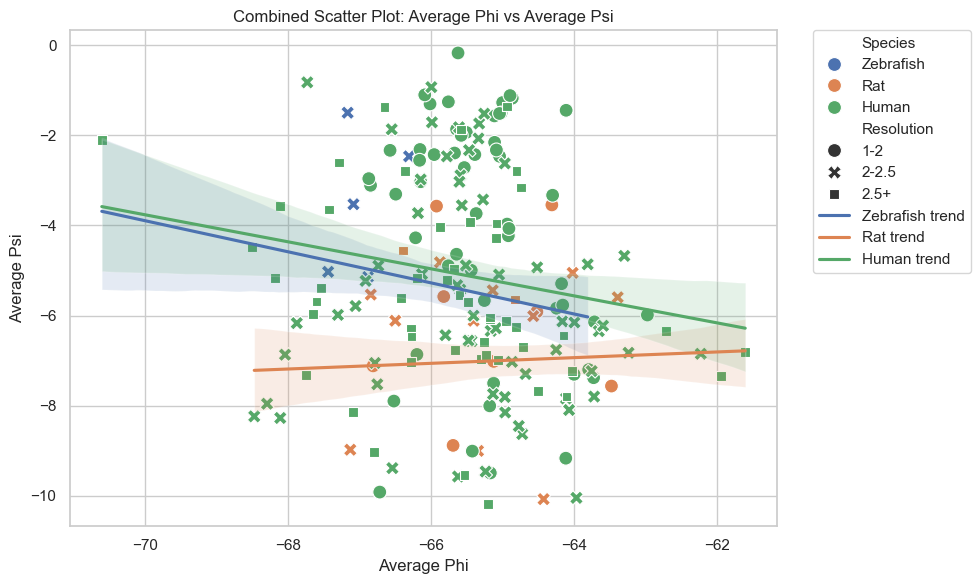

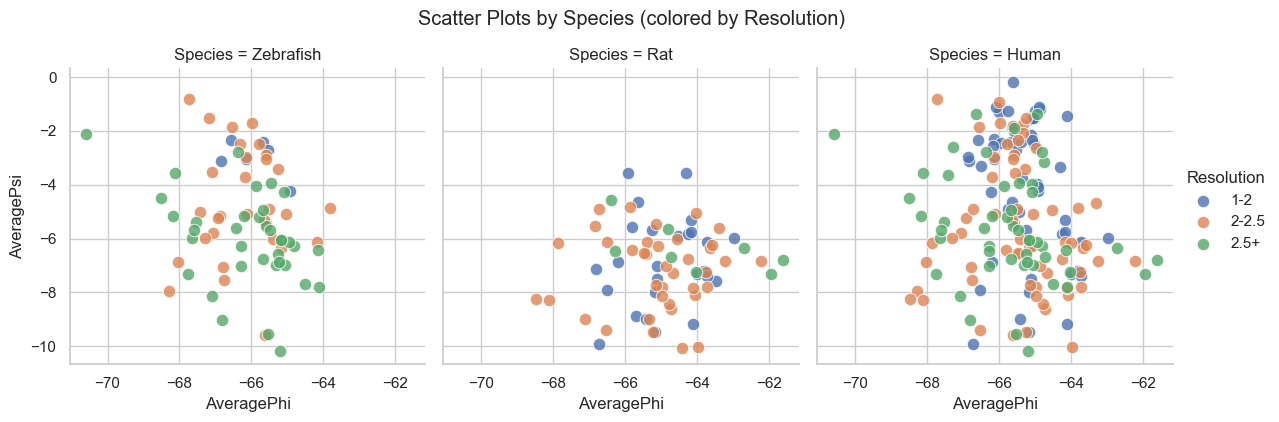

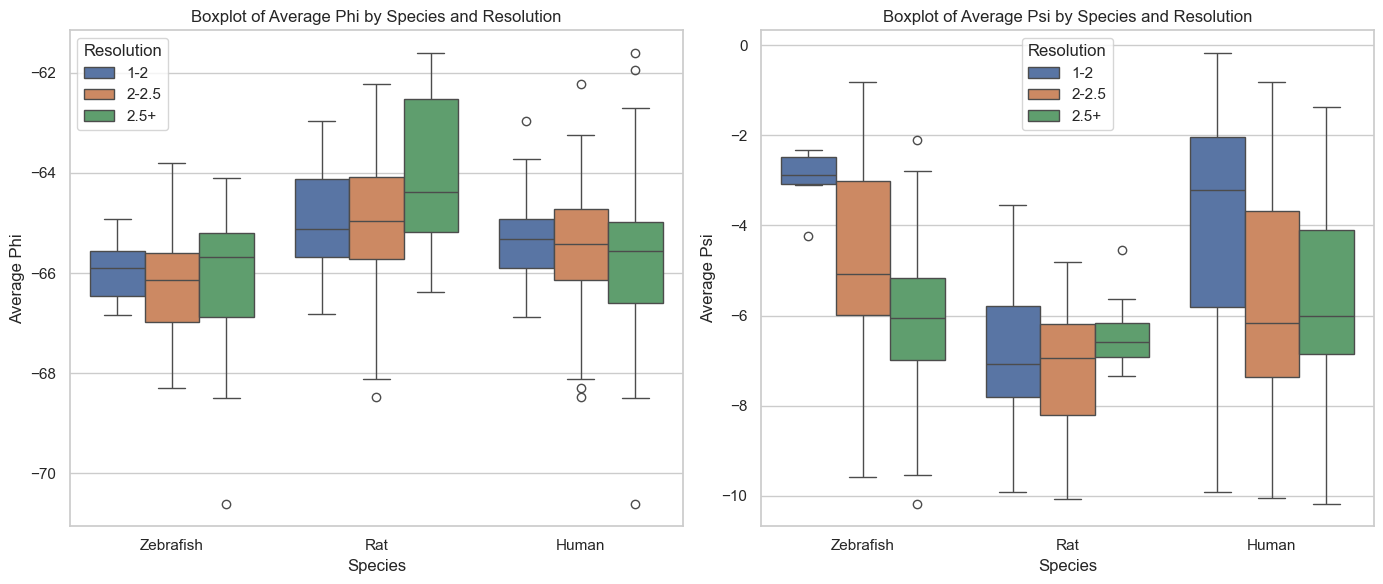

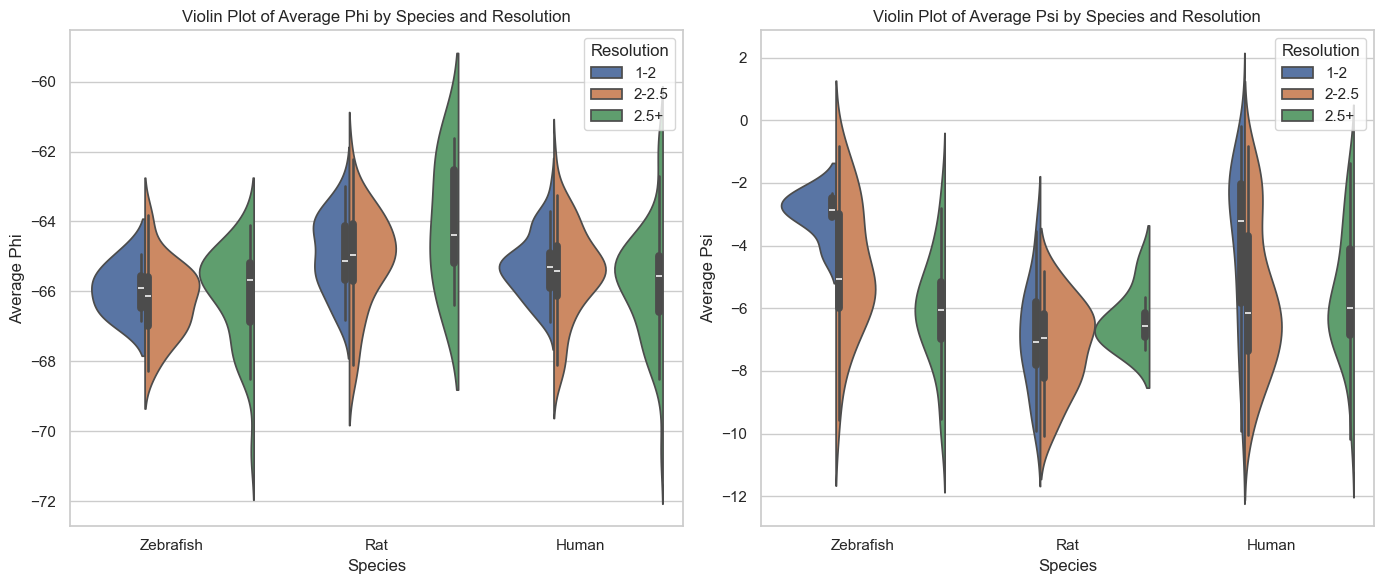

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Combined Scatter Plot with Regression Lines for each species
plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    data=master_df, 
    x="AveragePhi", 
    y="AveragePsi", 
    hue="Species", 
    style="Resolution", 
    s=100, 
    palette="deep"
)
for species in master_df["Species"].unique():
    subset = master_df[master_df["Species"] == species]

    sns.regplot(
        data=subset, 
        x="AveragePhi", 
        y="AveragePsi", 
        scatter=False, 
        label=f"{species} trend"
    )

plt.title("Combined Scatter Plot: Average Phi vs Average Psi")
plt.xlabel("Average Phi")
plt.ylabel("Average Psi")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

# 2. Species-specific Scatter Plots (Facet Grid)
g = sns.FacetGrid(master_df, col="Species", hue="Resolution", height=4, aspect=1)
g.map(sns.scatterplot, "AveragePhi", "AveragePsi", alpha=0.8, s=80)
g.add_legend()
g.fig.suptitle("Scatter Plots by Species (colored by Resolution)", y=1.05)
plt.show()

# 3. Distribution Plots using Boxplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(ax=axes[0], data=master_df, x="Species", y="AveragePhi", hue="Resolution")
axes[0].set_title("Boxplot of Average Phi by Species and Resolution")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Average Phi")

sns.boxplot(ax=axes[1], data=master_df, x="Species", y="AveragePsi", hue="Resolution")
axes[1].set_title("Boxplot of Average Psi by Species and Resolution")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Average Psi")

plt.tight_layout()
plt.show()

# 4. Distribution Plots using Violin Plots (not necessarily better than boxplots, but ig can be useful)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(ax=axes[0], data=master_df, x="Species", y="AveragePhi", hue="Resolution", split=True)
axes[0].set_title("Violin Plot of Average Phi by Species and Resolution")
axes[0].set_xlabel("Species")
axes[0].set_ylabel("Average Phi")

sns.violinplot(ax=axes[1], data=master_df, x="Species", y="AveragePsi", hue="Resolution", split=True)
axes[1].set_title("Violin Plot of Average Psi by Species and Resolution")
axes[1].set_xlabel("Species")
axes[1].set_ylabel("Average Psi")

plt.tight_layout()
plt.show()

c:\Users\Meiras\anaconda3\envs\deeplearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


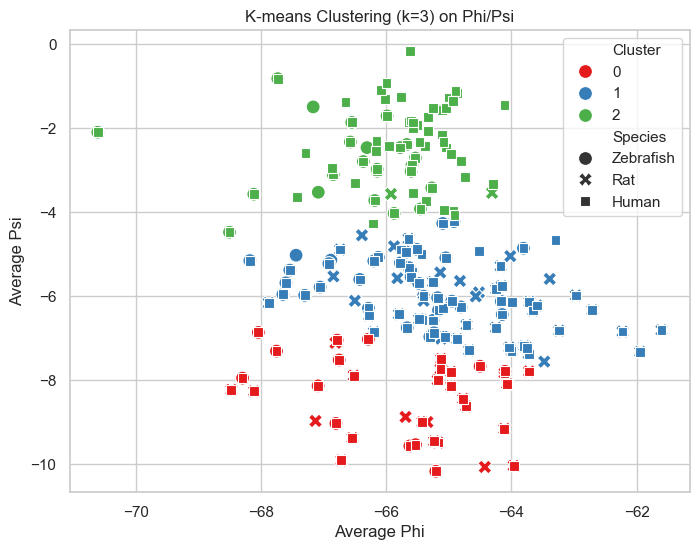

Cluster Centers (Phi, Psi):
[[-65.75952136  -8.41236702]
 [-65.11486214  -6.00381321]
 [-66.00033752  -2.5661875 ]]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = master_df[['AveragePhi', 'AveragePsi']]

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

master_df['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=master_df, 
    x='AveragePhi', 
    y='AveragePsi', 
    hue='Cluster',  
    palette='Set1',
    style='Species', 
    s=100
)
plt.title("K-means Clustering (k=3) on Phi/Psi")
plt.xlabel("Average Phi")
plt.ylabel("Average Psi")
plt.show()

# Optional: check cluster centers
print("Cluster Centers (Phi, Psi):")
print(kmeans.cluster_centers_)

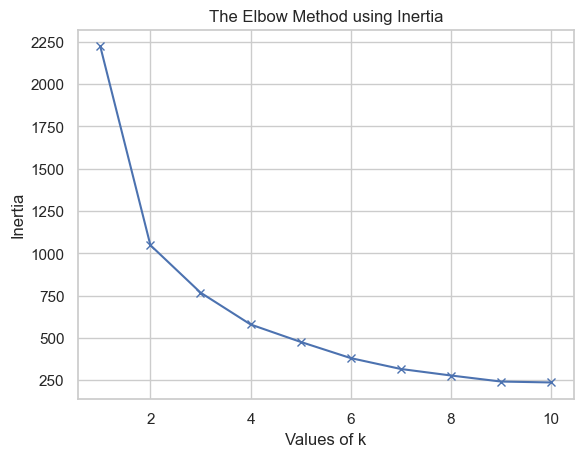

In [ ]:
### K-means clustering and Elbow Method
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = master_df[['AveragePhi', 'AveragePsi']]

# Elbow Method to determine optimal k
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)
    
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Based on the Elbow Method, we choose k=3 and k=4 for comparison

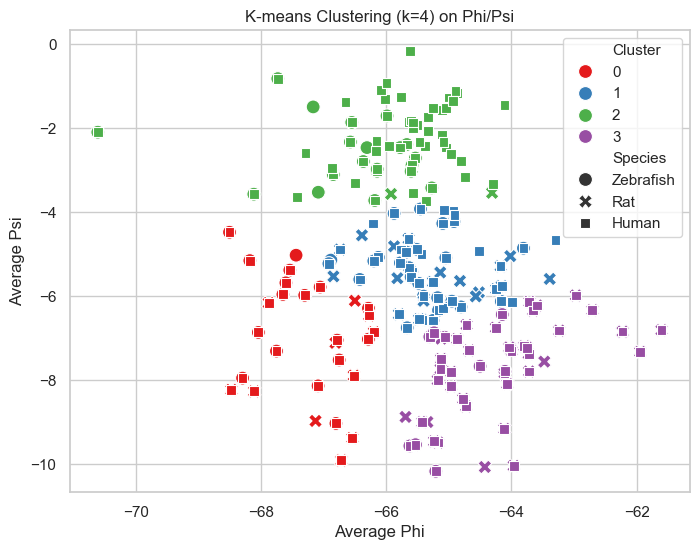

Cluster Centers (Phi, Psi):
[[-67.2516031   -7.0196834 ]
 [-65.30682963  -5.42998579]
 [-65.99028736  -2.36997084]
 [-64.28852523  -7.71923881]]


In [18]:
# Clustering with k=4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = master_df[['AveragePhi', 'AveragePsi']].values

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

master_df['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=master_df, 
    x='AveragePhi', 
    y='AveragePsi', 
    hue='Cluster',  
    palette='Set1',
    style='Species', 
    s=100
)
plt.title("K-means Clustering (k=4) on Phi/Psi")
plt.xlabel("Average Phi")
plt.ylabel("Average Psi")
plt.show()

# Optional: check cluster centers
print("Cluster Centers (Phi, Psi):")
print(kmeans.cluster_centers_)

For n_clusters = 2, the average silhouette score is: 0.453
For n_clusters = 3, the average silhouette score is: 0.378
For n_clusters = 4, the average silhouette score is: 0.395
For n_clusters = 5, the average silhouette score is: 0.382
For n_clusters = 6, the average silhouette score is: 0.405
For n_clusters = 7, the average silhouette score is: 0.399
For n_clusters = 8, the average silhouette score is: 0.395
For n_clusters = 9, the average silhouette score is: 0.401
For n_clusters = 10, the average silhouette score is: 0.374


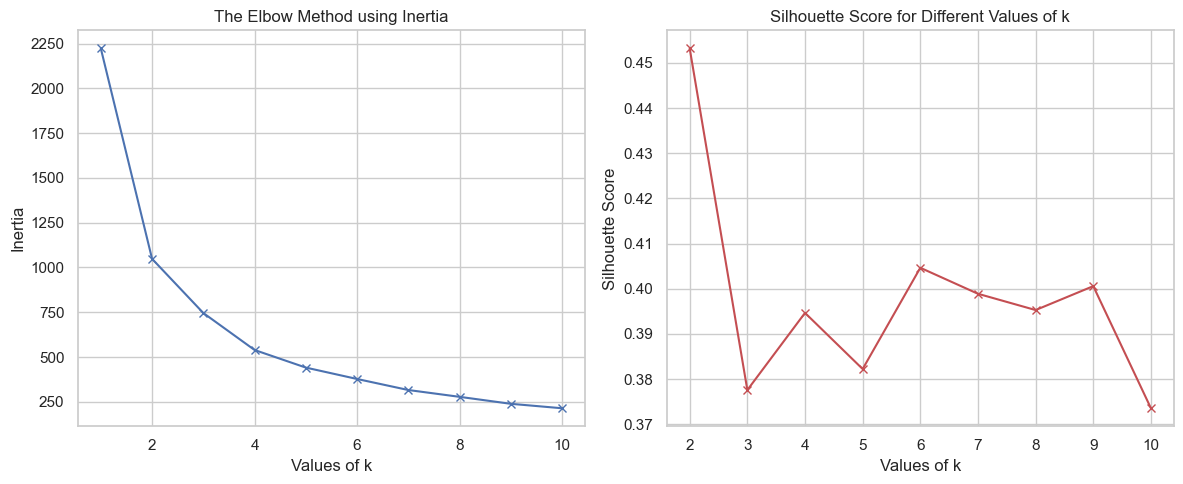

For n_clusters = 3, the average silhouette score is: 0.378
For n_clusters = 4, the average silhouette score is: 0.395


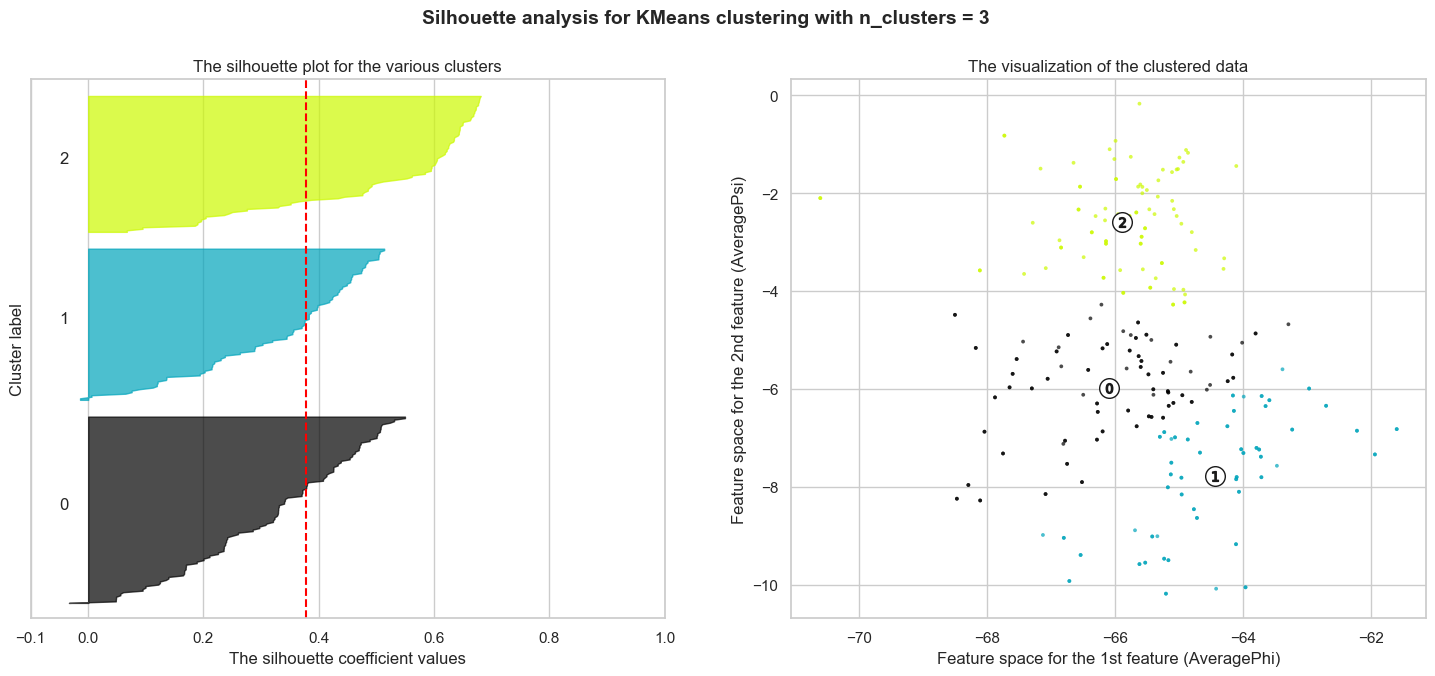

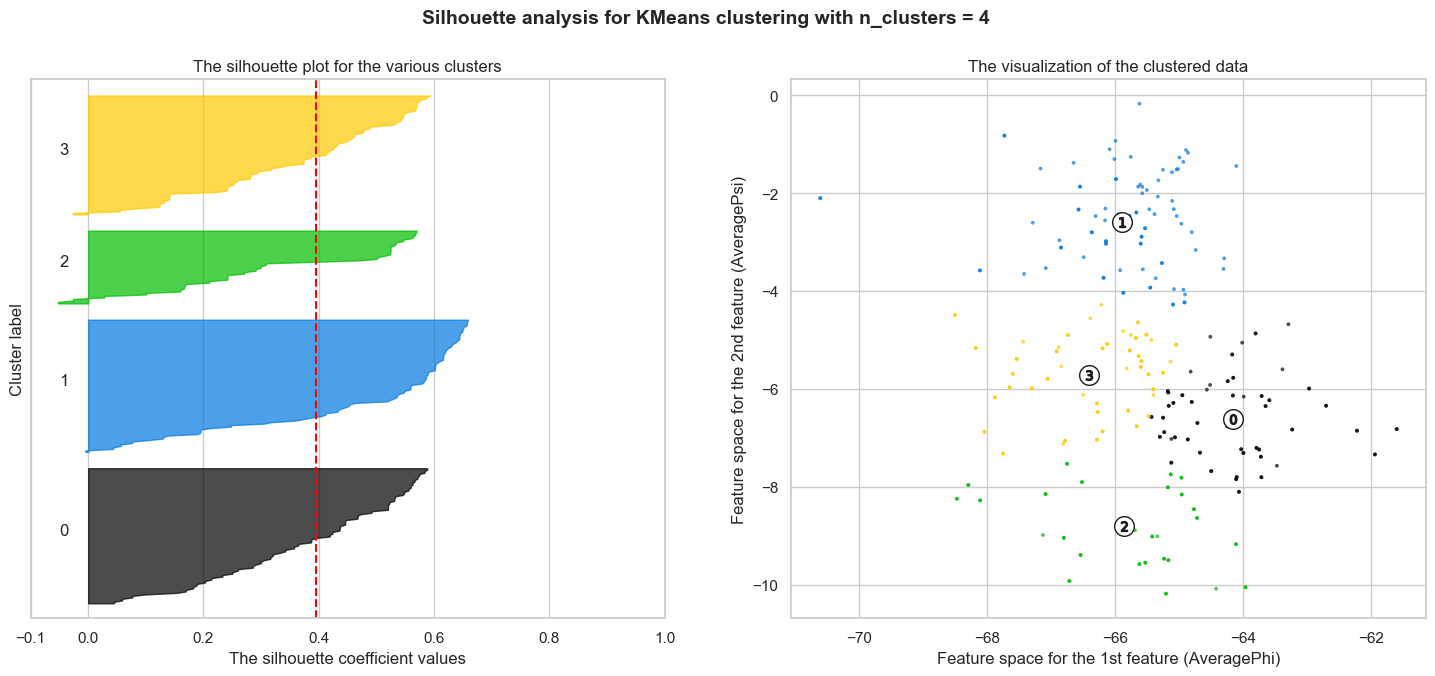


Cluster Summary:
        AveragePhi                                       AveragePsi            \
              mean       std        min        max count       mean       std   
cluster                                                                         
0       -64.157791  0.892488 -65.432640 -61.603292    92  -6.617894  0.774337   
1       -65.898179  1.084340 -70.605424 -64.108967    90  -2.579512  0.970710   
2       -65.863063  1.245029 -68.472310 -63.964555    50  -8.804198  0.799926   
3       -66.407702  0.929766 -68.502221 -65.047200    81  -5.716543  0.767454   

                              
               min       max  
cluster                       
0        -8.096169 -4.676441  
1        -4.273896 -0.172227  
2       -10.176516 -7.525839  
3        -7.314262 -4.275226  


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import os

X = master_df[['AveragePhi', 'AveragePsi']].values

# Part 1: Elbow Method
inertias = []
silhouette_scores = []
k_range = range(1, 11)  # Testing from 1 to 10 clusters

for k in k_range:
    if k > 1:  # Silhouette score requires at least 2 clusters
        # Fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        
        # Get inertia
        inertias.append(kmeans.inertia_)
        
        # Calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.3f}")
    else:
        # For k=1, only calculate inertia (silhouette score isn't defined for 1 cluster)
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(0)  # Placeholder for k=1

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'rx-')  # Skip k=1 as silhouette isn't defined
plt.xlabel('Values of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 2: Detailed Silhouette Analysis for the optimal k
# Based on the elbow method and silhouette scores, choose the optimal k
# For this example, we'll analyze k=3 and k=4 as they appear to be near the elbow point

for n_clusters in [3, 4]:  # You can adjust this based on the plots above
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.3f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature (AveragePhi)")
    ax2.set_ylabel("Feature space for the 2nd feature (AveragePsi)")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Finally, apply the optimal k to your data
optimal_k = 4  # Adjust this based on the analysis above
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X)

# Add the cluster labels to your dataframe
master_df['cluster'] = cluster_labels

# Summary of clusters
cluster_summary = master_df.groupby('cluster').agg({
    'AveragePhi': ['mean', 'std', 'min', 'max', 'count'],
    'AveragePsi': ['mean', 'std', 'min', 'max']
})

print("\nCluster Summary:")
print(cluster_summary)

"""
Outputs:

For n_clusters = 2, the average silhouette score is: 0.453
For n_clusters = 3, the average silhouette score is: 0.378
For n_clusters = 4, the average silhouette score is: 0.395
For n_clusters = 5, the average silhouette score is: 0.382
For n_clusters = 6, the average silhouette score is: 0.405
For n_clusters = 7, the average silhouette score is: 0.399
For n_clusters = 8, the average silhouette score is: 0.395
For n_clusters = 9, the average silhouette score is: 0.401
For n_clusters = 10, the average silhouette score is: 0.374


we selected k=3 and k=4 by using Elbow method:

For n_clusters = 3, the average silhouette score is: 0.378
For n_clusters = 4, the average silhouette score is: 0.395

The silhouette scores are not good. 

If the score is around 0.5 then it means resonable separation of clusters.
Score above 0.7 is considered as good separation.

so we need to try different clustering algorithms
"""

For n_clusters = 2, the average silhouette score is: 0.453
For n_clusters = 3, the average silhouette score is: 0.378
For n_clusters = 4, the average silhouette score is: 0.395
For n_clusters = 5, the average silhouette score is: 0.382
For n_clusters = 6, the average silhouette score is: 0.405
For n_clusters = 7, the average silhouette score is: 0.399
For n_clusters = 8, the average silhouette score is: 0.395
For n_clusters = 9, the average silhouette score is: 0.401
For n_clusters = 10, the average silhouette score is: 0.374


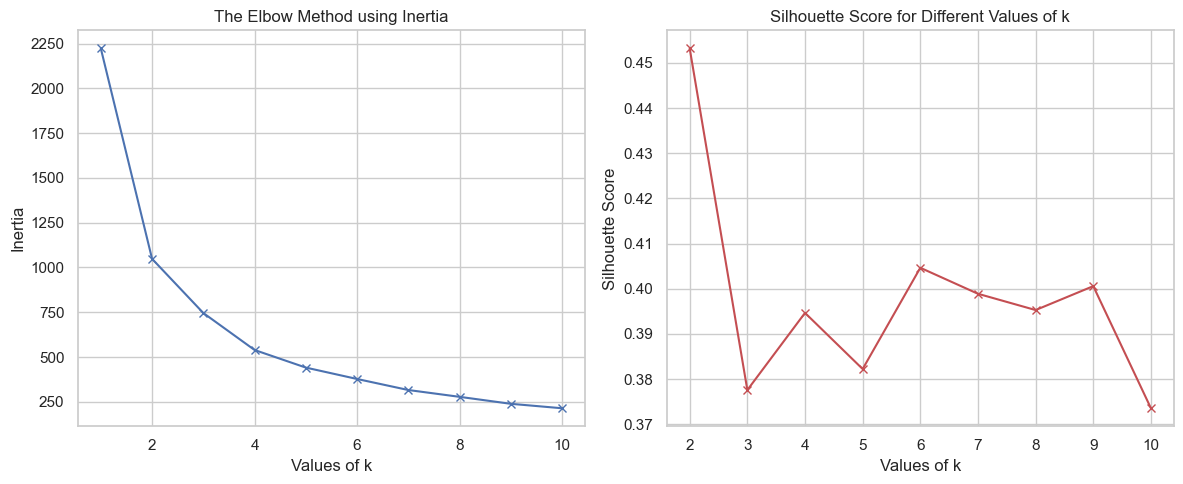

For n_clusters = 3, the average silhouette score is: 0.378
For n_clusters = 4, the average silhouette score is: 0.395


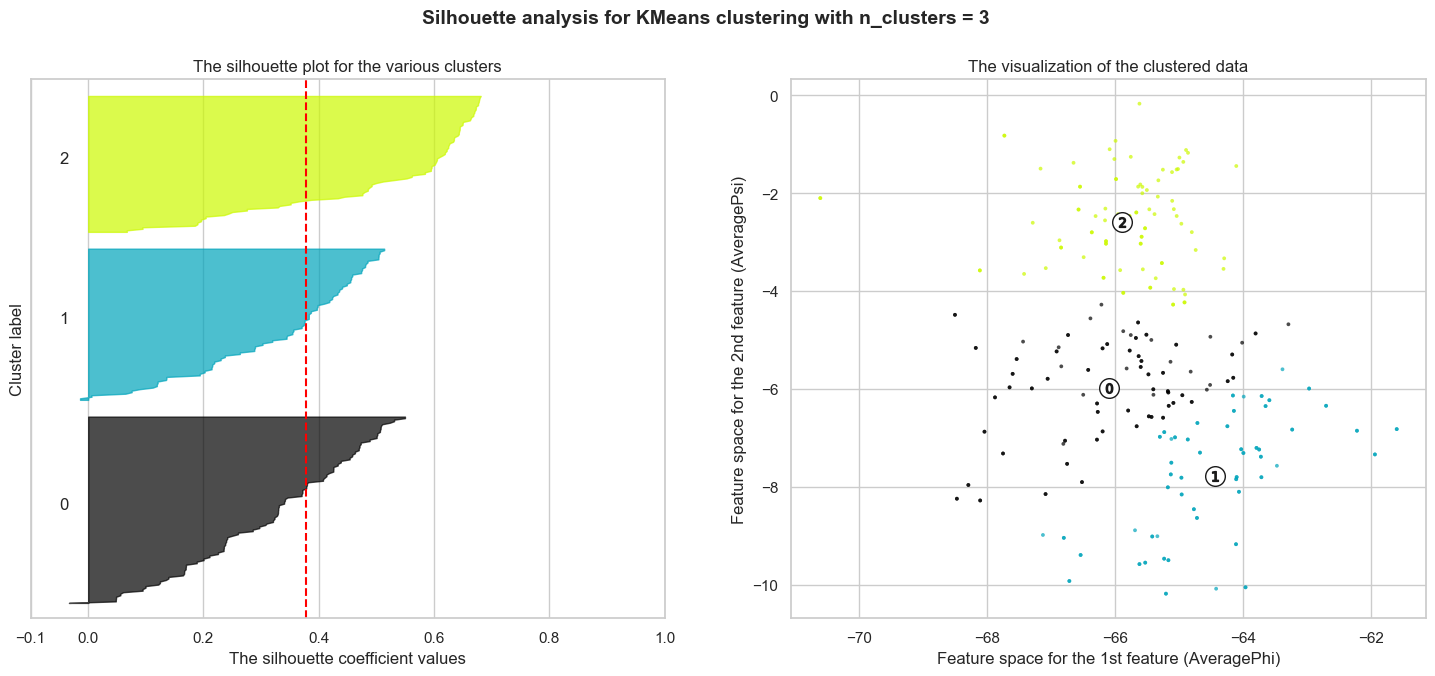

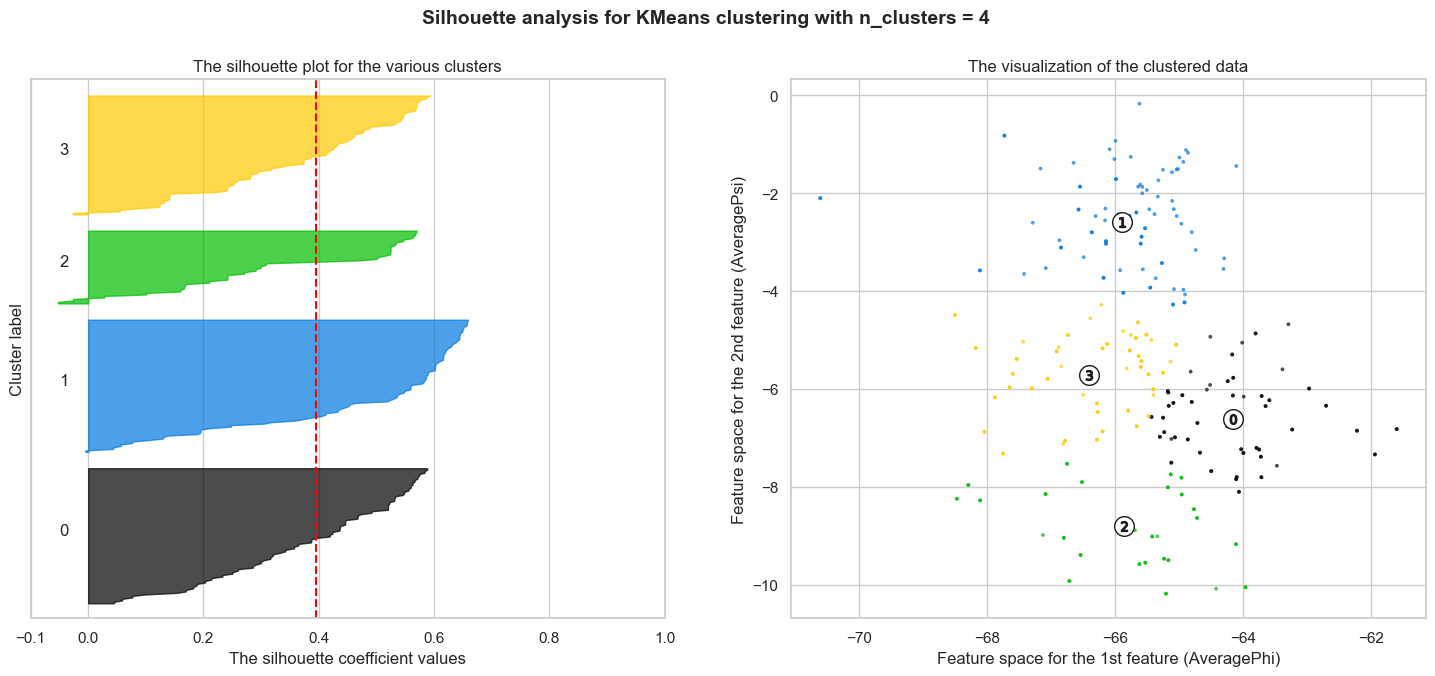


Cluster Summary:
        AveragePhi                                       AveragePsi            \
              mean       std        min        max count       mean       std   
cluster                                                                         
0       -64.157791  0.892488 -65.432640 -61.603292    92  -6.617894  0.774337   
1       -65.898179  1.084340 -70.605424 -64.108967    90  -2.579512  0.970710   
2       -65.863063  1.245029 -68.472310 -63.964555    50  -8.804198  0.799926   
3       -66.407702  0.929766 -68.502221 -65.047200    81  -5.716543  0.767454   

                              
               min       max  
cluster                       
0        -8.096169 -4.676441  
1        -4.273896 -0.172227  
2       -10.176516 -7.525839  
3        -7.314262 -4.275226  


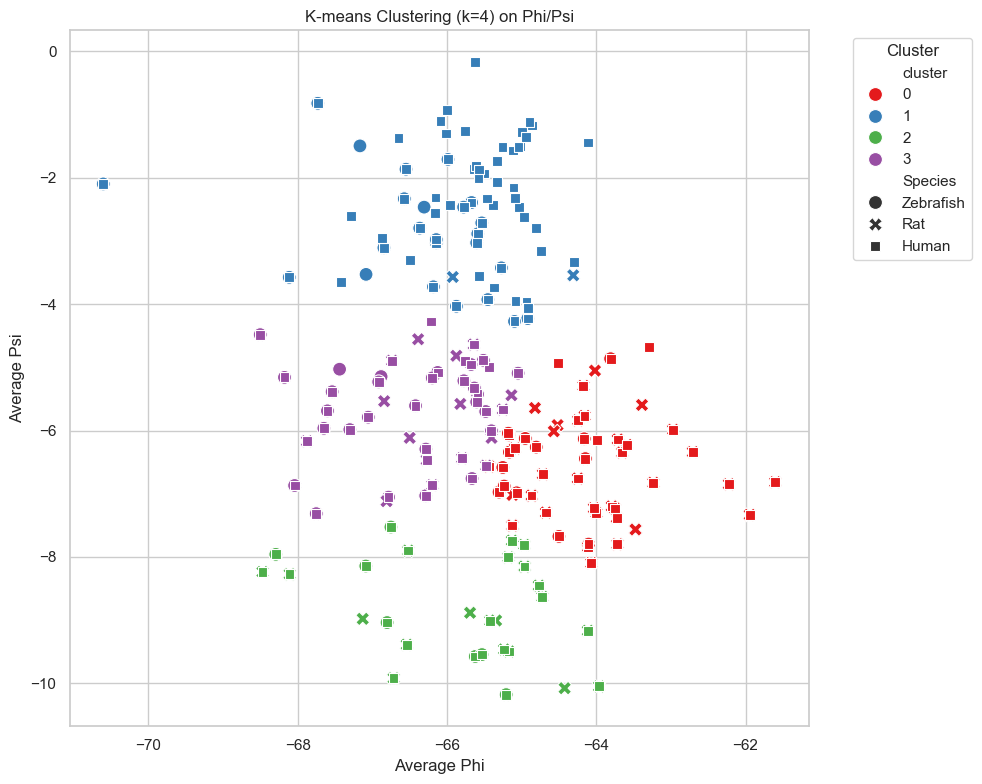


Species Distribution in Each Cluster:
Species  Human  Rat  Zebrafish  Total
cluster                              
0           44   34         14     92
1           64    2         24     90
2           23   20          7     50
3           37   16         28     81
Total      168   72         73    313

Species Distribution Percentages in Each Cluster:
Species  Human   Rat  Zebrafish
cluster                        
0         47.8  37.0       15.2
1         71.1   2.2       26.7
2         46.0  40.0       14.0
3         45.7  19.8       34.6


In [25]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import os

X = master_df[['AveragePhi', 'AveragePsi']].values

# Part 1: Elbow Method
inertias = []
silhouette_scores = []
k_range = range(1, 11)  # Testing from 1 to 10 clusters

for k in k_range:
    if k > 1:  # Silhouette score requires at least 2 clusters
        # Fit KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        
        # Get inertia
        inertias.append(kmeans.inertia_)
        
        # Calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, the average silhouette score is: {silhouette_avg:.3f}")
    else:
        # For k=1, only calculate inertia (silhouette score isn't defined for 1 cluster)
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(0)  # Placeholder for k=1

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], silhouette_scores[1:], 'rx-')  # Skip k=1 as silhouette isn't defined
plt.xlabel('Values of k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 2: Detailed Silhouette Analysis for the optimal k
# Based on the elbow method and silhouette scores, choose the optimal k
# For this example, we'll analyze k=3 and k=4 as they appear to be near the elbow point

for n_clusters in [3, 4]:  # You can adjust this based on the plots above
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg:.3f}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature (AveragePhi)")
    ax2.set_ylabel("Feature space for the 2nd feature (AveragePsi)")

    plt.suptitle(
        f"Silhouette analysis for KMeans clustering with n_clusters = {n_clusters}",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# Finally, apply the optimal k to your data
optimal_k = 4  # Adjust this based on the analysis above
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X)

# Add the cluster labels to your dataframe
master_df['cluster'] = cluster_labels

# Summary of clusters
cluster_summary = master_df.groupby('cluster').agg({
    'AveragePhi': ['mean', 'std', 'min', 'max', 'count'],
    'AveragePsi': ['mean', 'std', 'min', 'max']
})

print("\nCluster Summary:")
print(cluster_summary)

# ---- NEW CODE: Species Distribution Analysis ----

# Create a scatter plot with species and clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=master_df, 
    x='AveragePhi', 
    y='AveragePsi', 
    hue='cluster',  
    palette='Set1',
    style='Species', 
    s=100
)
plt.title("K-means Clustering (k=4) on Phi/Psi")
plt.xlabel("Average Phi")
plt.ylabel("Average Psi")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate counts of species in each cluster
species_cluster_counts = pd.crosstab(
    master_df['cluster'], 
    master_df['Species'],
    margins=True, 
    margins_name='Total'
)

# Display the counts as a table
print("\nSpecies Distribution in Each Cluster:")
print(species_cluster_counts)

# Calculate percentages within each cluster
species_cluster_percentages = pd.crosstab(
    master_df['cluster'], 
    master_df['Species'], 
    normalize='index'
) * 100

print("\nSpecies Distribution Percentages in Each Cluster:")
print(species_cluster_percentages.round(1))

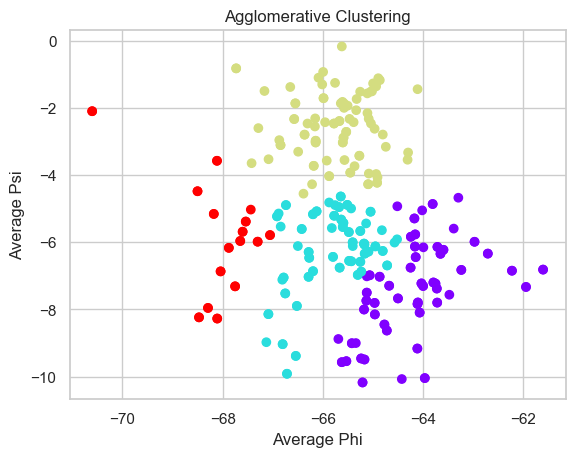


Species Distribution in Each Cluster:
Species  Human  Rat  Zebrafish  Total
cluster                              
0           44   34         14     92
1           64    2         24     90
2           23   20          7     50
3           37   16         28     81
Total      168   72         73    313

Species Distribution Percentages in Each Cluster:
Species  Human   Rat  Zebrafish
cluster                        
0         47.8  37.0       15.2
1         71.1   2.2       26.7
2         46.0  40.0       14.0
3         45.7  19.8       34.6


In [26]:
# Trying different clustering algorithms
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

# use pipeline to scale the data and perform clustering
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clustering', AgglomerativeClustering(n_clusters=4, linkage='ward'))
])

y_pred = pipeline.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Average Phi')
plt.ylabel('Average Psi')
plt.show()


# Calculate counts of species in each cluster
species_cluster_counts = pd.crosstab(
    master_df['cluster'], 
    master_df['Species'],
    margins=True, 
    margins_name='Total'
)

# Display the counts as a table
print("\nSpecies Distribution in Each Cluster:")
print(species_cluster_counts)

# Calculate percentages within each cluster
species_cluster_percentages = pd.crosstab(
    master_df['cluster'], 
    master_df['Species'], 
    normalize='index'
) * 100

print("\nSpecies Distribution Percentages in Each Cluster:")
print(species_cluster_percentages.round(1))

For n_clusters = 2 The average silhouette_score is : 0.45574746186391146
For n_clusters = 3 The average silhouette_score is : 0.39984175579245373
For n_clusters = 4 The average silhouette_score is : 0.41671234410745117
For n_clusters = 5 The average silhouette_score is : 0.3467522954777529
For n_clusters = 6 The average silhouette_score is : 0.36590840649753054
For n_clusters = 7 The average silhouette_score is : 0.3887081625139864
For n_clusters = 8 The average silhouette_score is : 0.3435459743389418
For n_clusters = 9 The average silhouette_score is : 0.3545521109223071
For n_clusters = 10 The average silhouette_score is : 0.3385092586089


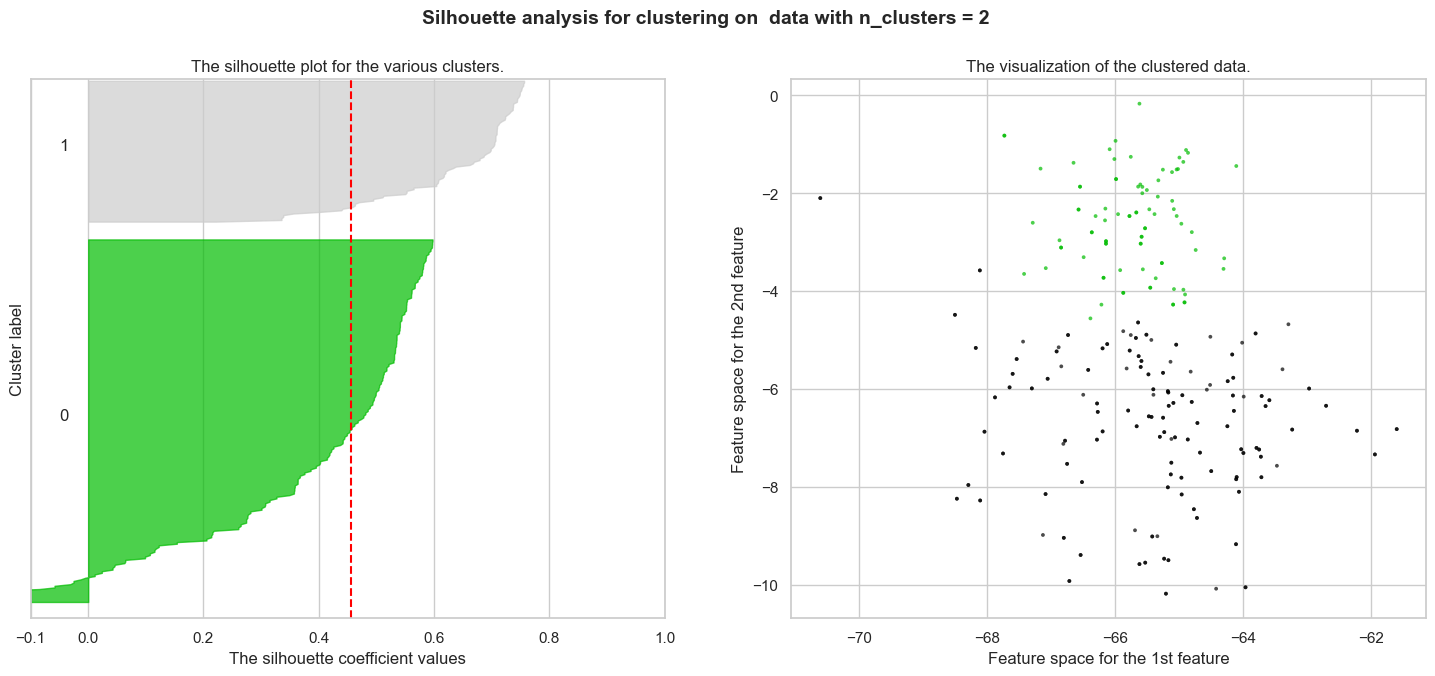

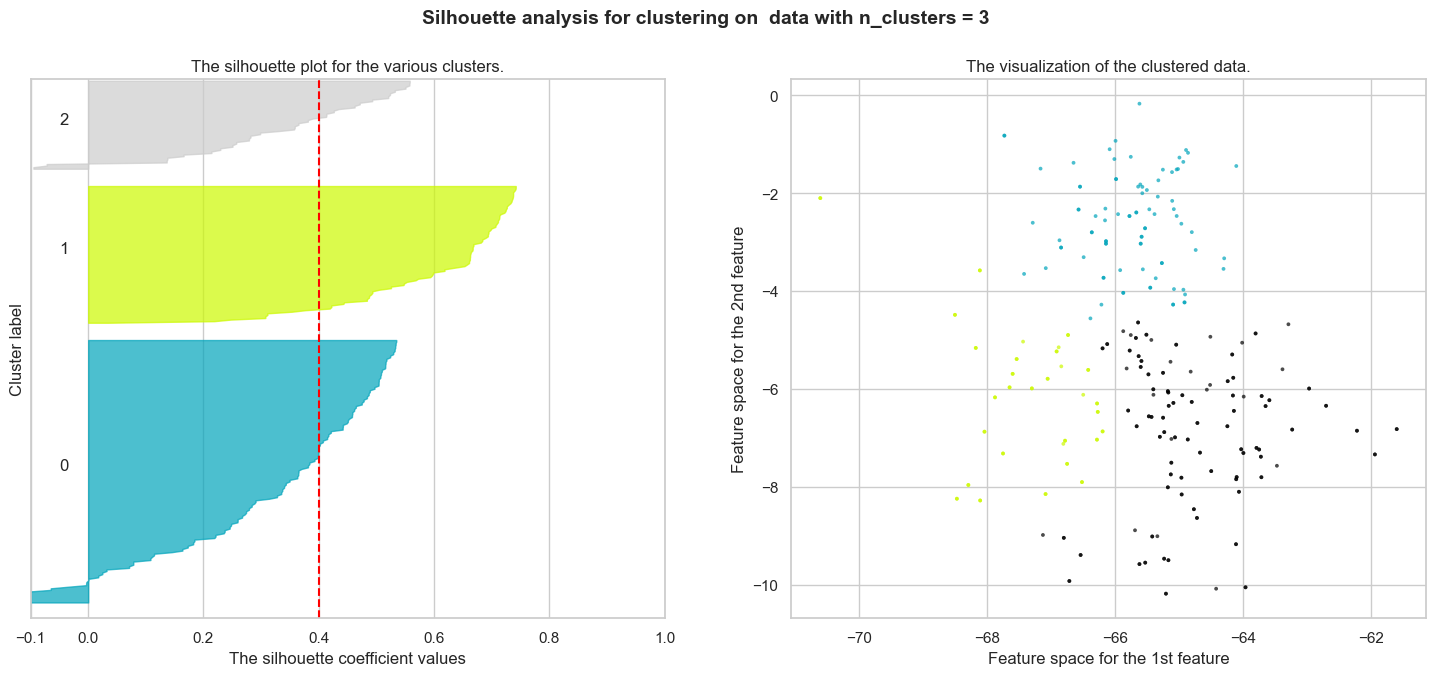

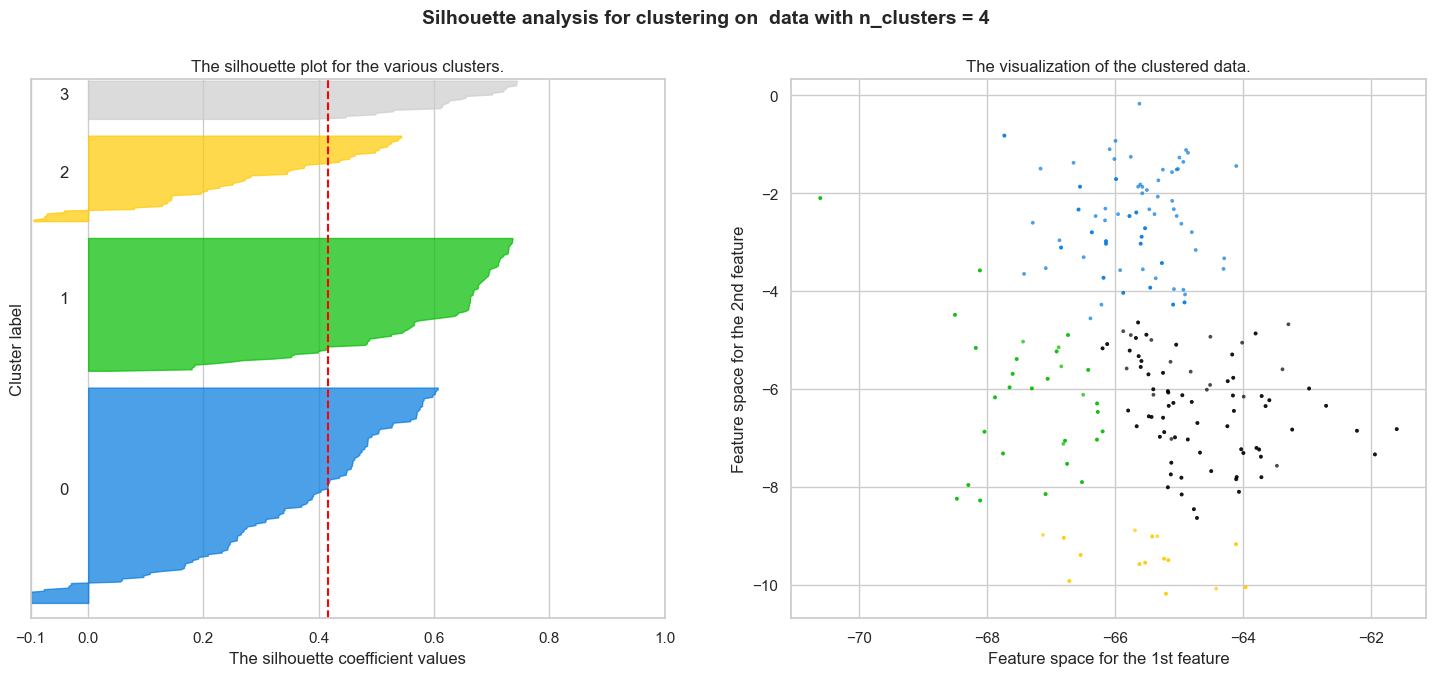

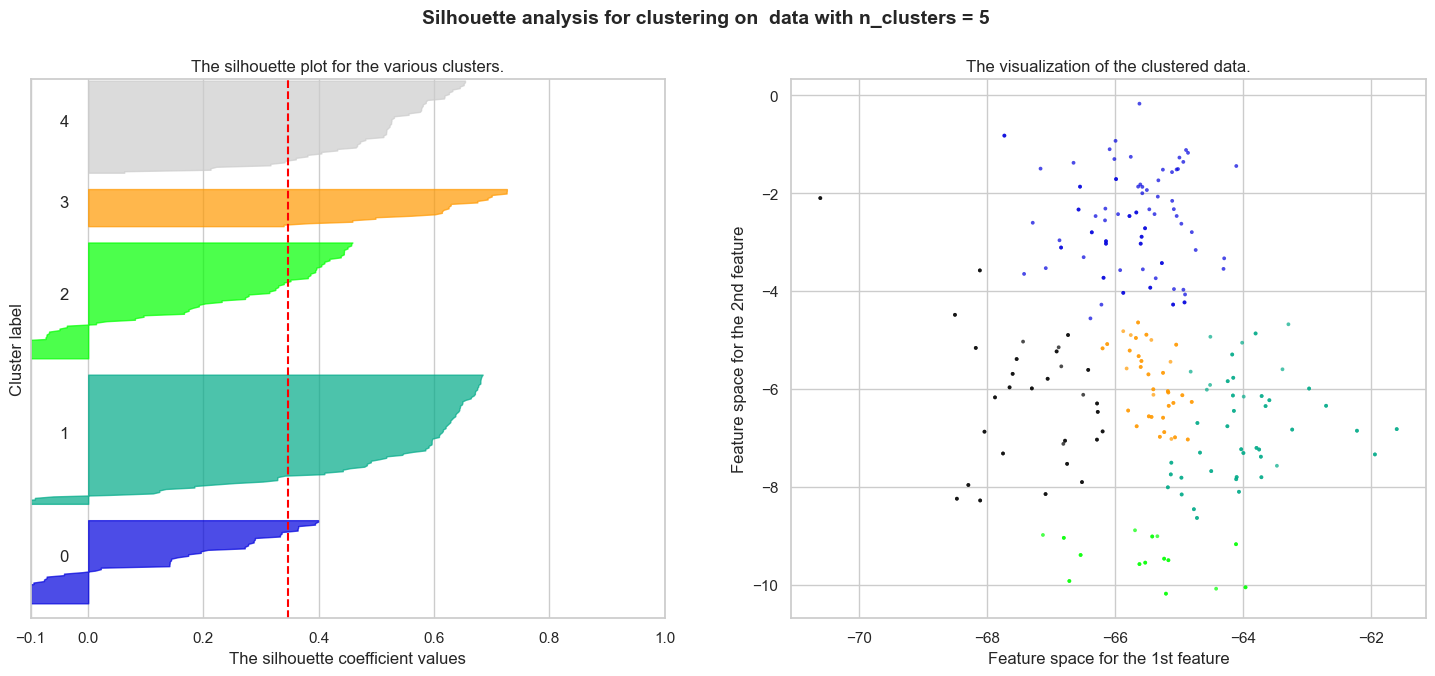

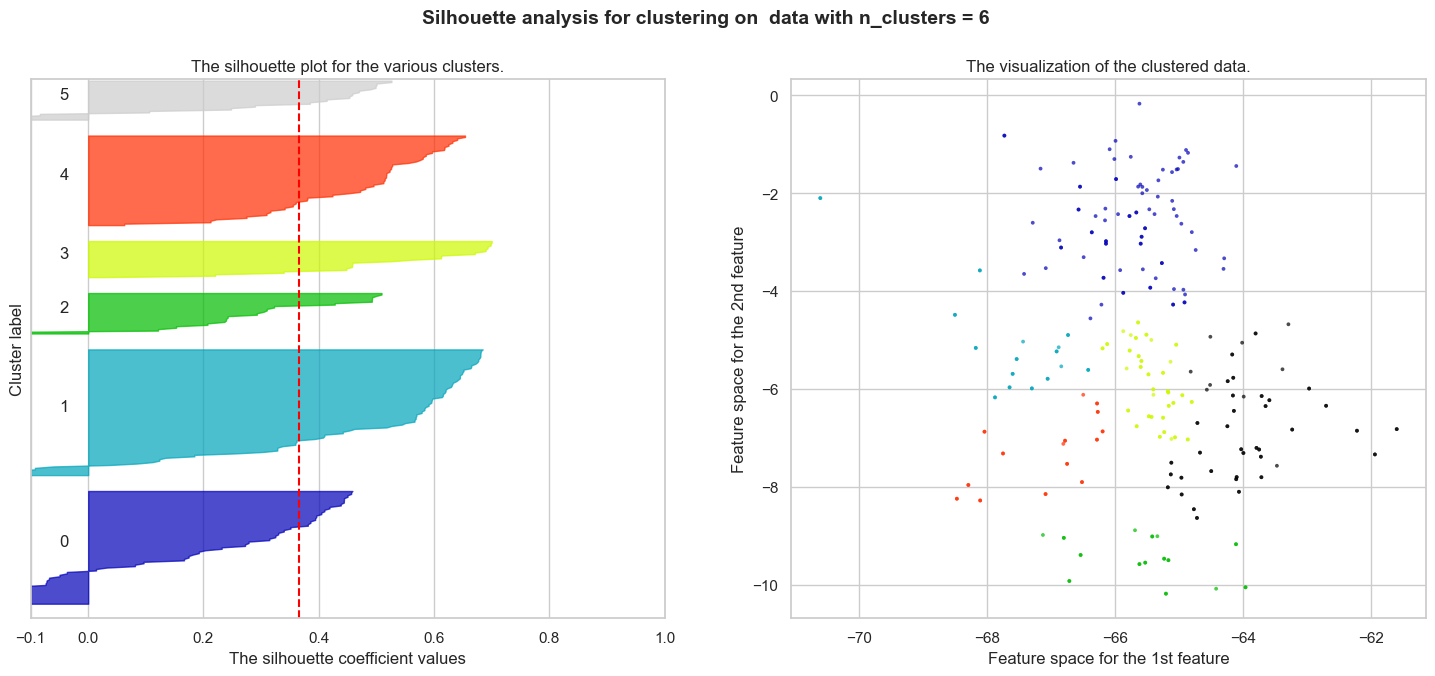

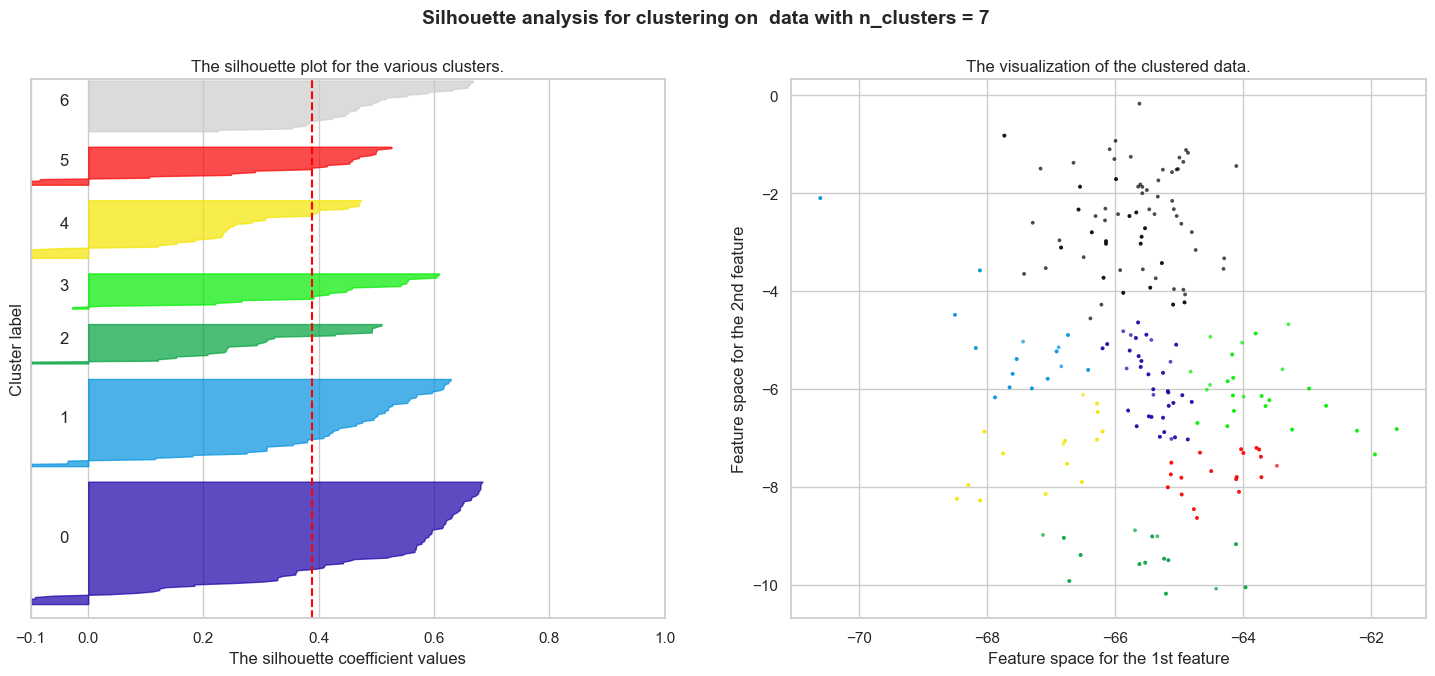

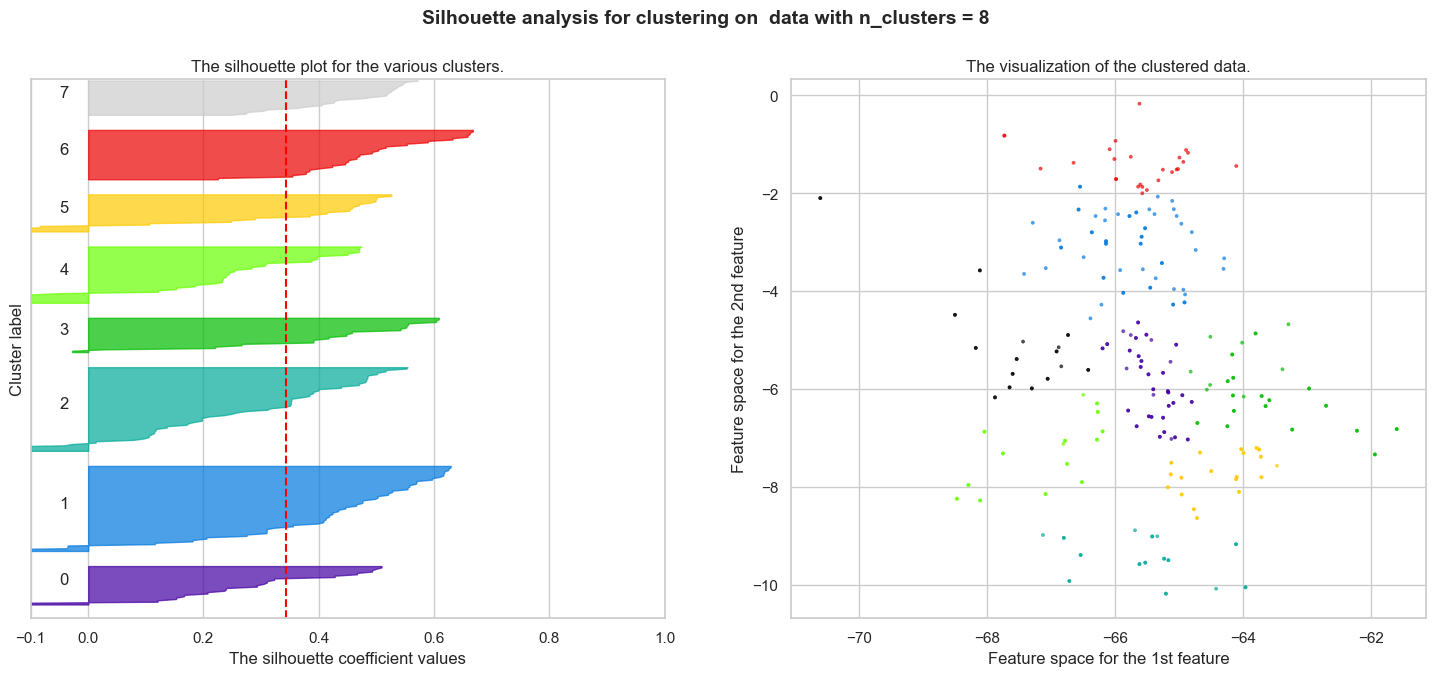

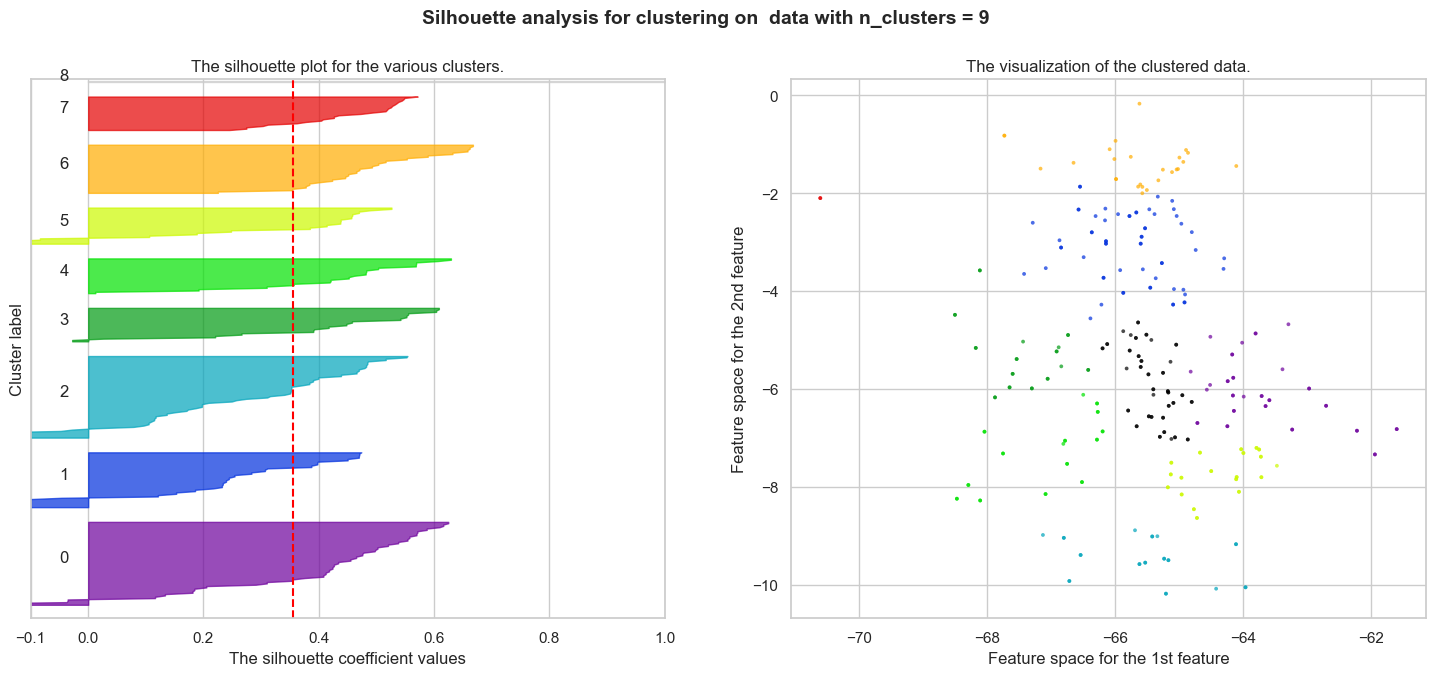

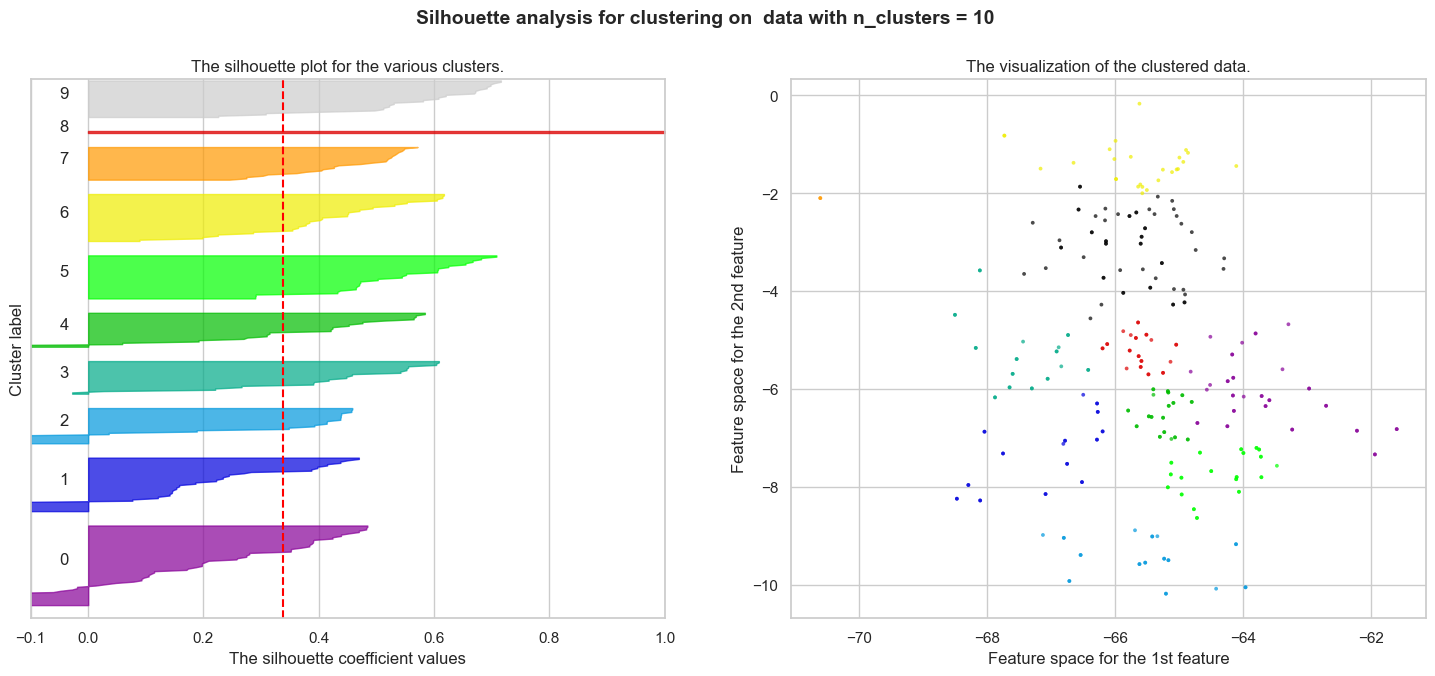

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
df = pd.read_csv('master.csv')

# Exploratory Data Analysis
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData summary:")
print(df.describe())
print("\nUnique values per column:")
print(df.nunique())
print("\nCount of each Species:")
print(df.Species.value_counts())
print("\nCount of each Resolution:")
print(df.Resolution.value_counts())

# Plot the distribution of Phi and Psi angles by species
plt.figure(figsize=(12, 8))
colors = {'Zebrafish': 'blue', 'Rat': 'red', 'Human': 'green'}
for species in df.Species.unique():
    subset = df[df.Species == species]
    plt.scatter(subset.AveragePhi, subset.AveragePsi, alpha=0.7, 
                label=species, color=colors[species])
plt.xlabel('Average Phi Angle')
plt.ylabel('Average Psi Angle')
plt.title('Distribution of Phi and Psi Angles by Species')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('angle_distribution_by_species.png')
plt.close()

# Prepare data for clustering
X = df[['AveragePhi', 'AveragePsi']].values
species_labels = df['Species'].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to perform K-Means clustering with elbow method
def kmeans_elbow(X, max_k=10):
    distortions = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)
    
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))
    
    # Plot elbow method
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(K_range, distortions, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for K-Means')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for K-Means')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('kmeans_elbow_method.png')
    plt.close()
    
    best_k = K_range[np.argmax(silhouette_scores)]
    max_score = max(silhouette_scores)
    
    return best_k, max_score, silhouette_scores

# Function to perform Gaussian Mixture Model clustering
def gmm_elbow(X, max_k=10):
    bic_scores = []
    silhouette_scores = []
    K_range = range(2, max_k + 1)
    
    for k in K_range:
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(X)
        labels = gmm.predict(X)
        bic_scores.append(gmm.bic(X))
        silhouette_scores.append(silhouette_score(X, labels))
    
    # Plot BIC scores and silhouette scores
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(K_range, bic_scores, 'bo-')
    plt.xlabel('Number of components (k)')
    plt.ylabel('BIC Score')
    plt.title('BIC Score for GMM')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of components (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for GMM')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('gmm_elbow_method.png')
    plt.close()
    
    best_k = K_range[np.argmax(silhouette_scores)]
    max_score = max(silhouette_scores)
    
    return best_k, max_score, silhouette_scores

# Function to perform Agglomerative clustering
def agglomerative_elbow(X, max_k=10):
    silhouette_scores = []
    K_range = range(2, max_k + 1)
    
    for k in K_range:
        agg = AgglomerativeClustering(n_clusters=k)
        labels = agg.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))
    
    # Plot silhouette scores
    plt.figure(figsize=(8, 5))
    plt.plot(K_range, silhouette_scores, 'ro-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores for Agglomerative Clustering')
    plt.grid(True, alpha=0.3)
    plt.savefig('agglomerative_elbow_method.png')
    plt.close()
    
    best_k = K_range[np.argmax(silhouette_scores)]
    max_score = max(silhouette_scores)
    
    return best_k, max_score, silhouette_scores

# Function to find optimal eps for DBSCAN
def optimal_eps(X, min_samples=5):
    from sklearn.neighbors import NearestNeighbors
    
    nn = NearestNeighbors(n_neighbors=min_samples)
    nn.fit(X)
    distances, indices = nn.kneighbors(X)
    
    # Sort distances in ascending order
    distances = np.sort(distances[:, min_samples-1])
    
    # Plot k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(distances)), distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.title('K-distance Graph for DBSCAN eps Parameter')
    plt.grid(True, alpha=0.3)
    plt.savefig('dbscan_kdistance_graph.png')
    plt.close()
    
    # Find the "elbow" point
    # For simplicity, we'll use a heuristic approach
    # Computing first differences and finding where they start to level off
    diffs = np.diff(distances)
    
    # Find where the difference drops below the mean
    threshold = np.mean(diffs)
    elbow_point = np.where(diffs < threshold)[0]
    if len(elbow_point) > 0:
        elbow_point = elbow_point[0]
        optimal_eps = distances[elbow_point]
    else:
        # Default if we can't find a clear elbow
        optimal_eps = np.median(distances)
    
    return optimal_eps

# Function to visualize clustering results
def plot_clusters(X, labels, title, filename):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('Average Phi Angle')
    plt.ylabel('Average Psi Angle')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.savefig(filename)
    plt.close()

# Function to compare clustering with actual species labels
def compare_clusters_with_species(X, cluster_labels, species_labels, title, filename):
    # Create a DataFrame with original data, cluster labels and species
    df_compare = pd.DataFrame({
        'AveragePhi': X[:, 0],
        'AveragePsi': X[:, 1],
        'Cluster': cluster_labels,
        'Species': species_labels
    })
    
    # Plot comparison
    plt.figure(figsize=(14, 6))
    
    # Plot clusters
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel('Average Phi Angle')
    plt.ylabel('Average Psi Angle')
    plt.title(f'{title} - Clusters')
    plt.grid(True, alpha=0.3)
    
    # Plot species
    plt.subplot(1, 2, 2)
    colors = {'Zebrafish': 0, 'Rat': 1, 'Human': 2}
    color_list = [colors[s] for s in species_labels]
    species_cmap = ListedColormap(['blue', 'red', 'green'])
    scatter = plt.scatter(X[:, 0], X[:, 1], c=color_list, cmap=species_cmap, alpha=0.7)
    plt.colorbar(scatter, label='Species', ticks=[0, 1, 2], 
                 boundaries=[-0.5, 0.5, 1.5, 2.5],
                 drawedges=True)
    plt.colorbar(scatter).set_ticklabels(['Zebrafish', 'Rat', 'Human'])
    plt.xlabel('Average Phi Angle')
    plt.ylabel('Average Psi Angle')
    plt.title('Actual Species')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()
    
    # Cross-tabulation of clusters vs species
    cross_tab = pd.crosstab(df_compare['Cluster'], df_compare['Species'])
    print(f"\nCross-tabulation for {title}:")
    print(cross_tab)
    
    return cross_tab

# Run K-Means clustering
print("\n--- K-Means Clustering ---")
kmeans_best_k, kmeans_max_score, kmeans_scores = kmeans_elbow(X_scaled)
print(f"Best K for K-Means: {kmeans_best_k} with silhouette score: {kmeans_max_score:.4f}")

# Apply K-Means with best k
kmeans = KMeans(n_clusters=kmeans_best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
plot_clusters(X, kmeans_labels, f'K-Means Clustering (k={kmeans_best_k})', 'kmeans_clusters.png')
kmeans_cross_tab = compare_clusters_with_species(X, kmeans_labels, species_labels, 
                                               f'K-Means (k={kmeans_best_k})', 
                                               'kmeans_species_comparison.png')

# Run GMM clustering
print("\n--- Gaussian Mixture Model Clustering ---")
gmm_best_k, gmm_max_score, gmm_scores = gmm_elbow(X_scaled)
print(f"Best K for GMM: {gmm_best_k} with silhouette score: {gmm_max_score:.4f}")

# Apply GMM with best k
gmm = GaussianMixture(n_components=gmm_best_k, random_state=42)
gmm.fit(X_scaled)
gmm_labels = gmm.predict(X_scaled)
plot_clusters(X, gmm_labels, f'GMM Clustering (k={gmm_best_k})', 'gmm_clusters.png')
gmm_cross_tab = compare_clusters_with_species(X, gmm_labels, species_labels, 
                                             f'GMM (k={gmm_best_k})', 
                                             'gmm_species_comparison.png')

# Run Agglomerative Clustering
print("\n--- Agglomerative Clustering ---")
agg_best_k, agg_max_score, agg_scores = agglomerative_elbow(X_scaled)
print(f"Best K for Agglomerative: {agg_best_k} with silhouette score: {agg_max_score:.4f}")

# Apply Agglomerative with best k
agg = AgglomerativeClustering(n_clusters=agg_best_k)
agg_labels = agg.fit_predict(X_scaled)
plot_clusters(X, agg_labels, f'Agglomerative Clustering (k={agg_best_k})', 'agglomerative_clusters.png')
agg_cross_tab = compare_clusters_with_species(X, agg_labels, species_labels, 
                                             f'Agglomerative (k={agg_best_k})', 
                                             'agglomerative_species_comparison.png')

# Hierarchical clustering dendrogram (for visualization)
plt.figure(figsize=(12, 8))
Z = linkage(X_scaled, method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.savefig('hierarchical_dendrogram.png')
plt.close()

Dataset shape: (313, 5)

First few rows:
    PDB  AveragePhi  AveragePsi    Species Resolution
0  9EZ1  -65.670234   -2.393472  Zebrafish        1-2
1  9EZ2  -66.572262   -2.333679  Zebrafish        1-2
2  9GYA  -66.845104   -3.109599  Zebrafish        1-2
3  9GYJ  -64.917435   -4.229558  Zebrafish        1-2
4  4Q0A  -66.143859   -3.030663  Zebrafish        1-2

Data summary:
       AveragePhi  AveragePsi
count  313.000000  313.000000
mean   -65.512875   -5.572691
std      1.358176    2.297946
min    -70.605424  -10.176516
25%    -66.282997   -7.200200
50%    -65.435615   -5.985381
75%    -64.804579   -3.736669
max    -61.603292   -0.172227

Unique values per column:
PDB           194
AveragePhi    194
AveragePsi    194
Species         3
Resolution      3
dtype: int64

Count of each Species:
Species
Human        168
Zebrafish     73
Rat           72
Name: count, dtype: int64

Count of each Resolution:
Resolution
2-2.5    133
2.5+      94
1-2       86
Name: count, dtype: int64

--- K-M

Data sample:
    PDB  AveragePhi  AveragePsi    Species Resolution
0  9EZ1  -65.670234   -2.393472  Zebrafish        1-2
1  9EZ2  -66.572262   -2.333679  Zebrafish        1-2
2  9GYA  -66.845104   -3.109599  Zebrafish        1-2
3  9GYJ  -64.917435   -4.229558  Zebrafish        1-2
4  4Q0A  -66.143859   -3.030663  Zebrafish        1-2


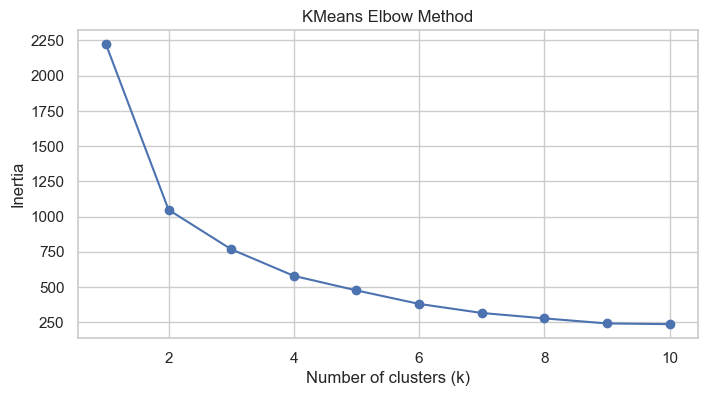

KMeans Silhouette Scores:
  k = 2: 0.4532
  k = 3: 0.3787
  k = 4: 0.3732
  k = 5: 0.3917
  k = 6: 0.3892
  k = 7: 0.4003
  k = 8: 0.3953
  k = 9: 0.4070
  k = 10: 0.3773

Adjusted Rand Index for KMeans with 3 clusters: 0.0194

Agglomerative Clustering Silhouette Scores:
  k = 2: 0.4557
  k = 3: 0.3998
  k = 4: 0.4167
  k = 5: 0.3468
  k = 6: 0.3659
  k = 7: 0.3887
  k = 8: 0.3435
  k = 9: 0.3546
  k = 10: 0.3385

Gaussian Mixture Silhouette Scores:
  k = 2: 0.4695
  k = 3: 0.3761
  k = 4: 0.3727
  k = 5: 0.3812
  k = 6: 0.3720
  k = 7: 0.2907
  k = 8: 0.2812
  k = 9: 0.3952
  k = 10: 0.3371

Spectral Clustering Silhouette Scores:
  k = 2: 0.4756
  k = 3: 0.3566
  k = 4: 0.3950
  k = 5: 0.3721
  k = 6: 0.3439
  k = 7: 0.3042
  k = 8: 0.3028
  k = 9: 0.3006
  k = 10: 0.2823


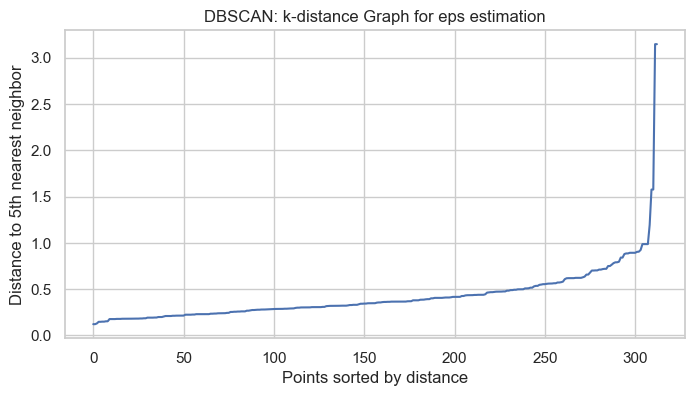


DBSCAN found clusters: [-1  0  1  2  3  4  5]
DBSCAN Silhouette Score: 0.1235


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering and evaluation modules
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors

# -------------------------------
# 1. Load the dataset
# -------------------------------
df = pd.read_csv('master.csv')
print("Data sample:")
print(df.head())

# Extract features and the target species (for later comparison)
X = df[['AveragePhi', 'AveragePsi']].values
species = df['Species'].values

# -------------------------------
# 2. KMeans Clustering: Elbow Method & Silhouette Scores
# -------------------------------
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.show()

# Compute silhouette scores for k from 2 to 10
kmeans_sil = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    kmeans_sil[k] = score

print("KMeans Silhouette Scores:")
for k, score in kmeans_sil.items():
    print(f"  k = {k}: {score:.4f}")

# Optionally, if we expect 3 species, evaluate KMeans with k=3 vs. true labels.
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_k3 = kmeans_3.fit_predict(X)
ari = adjusted_rand_score(species, labels_k3)
print(f"\nAdjusted Rand Index for KMeans with 3 clusters: {ari:.4f}")

# -------------------------------
# 3. Agglomerative Clustering: Silhouette Scores
# -------------------------------
agglo_sil = {}
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X)
    score = silhouette_score(X, labels)
    agglo_sil[k] = score

print("\nAgglomerative Clustering Silhouette Scores:")
for k, score in agglo_sil.items():
    print(f"  k = {k}: {score:.4f}")

# -------------------------------
# 4. Gaussian Mixture Models (GMM): Silhouette Scores
# -------------------------------
gmm_sil = {}
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    labels = gmm.predict(X)
    score = silhouette_score(X, labels)
    gmm_sil[k] = score

print("\nGaussian Mixture Silhouette Scores:")
for k, score in gmm_sil.items():
    print(f"  k = {k}: {score:.4f}")

# -------------------------------
# 5. Spectral Clustering: Silhouette Scores
# -------------------------------
spectral_sil = {}
for k in range(2, 11):
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(X)
    score = silhouette_score(X, labels)
    spectral_sil[k] = score

print("\nSpectral Clustering Silhouette Scores:")
for k, score in spectral_sil.items():
    print(f"  k = {k}: {score:.4f}")

# -------------------------------
# 6. DBSCAN: Estimating a good epsilon & Silhouette Score
# -------------------------------
# Plot the distances to the 5th nearest neighbor to help choose eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
# Sort the distances for the 5th neighbor (index 4)
distances_5th = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances_5th)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('DBSCAN: k-distance Graph for eps estimation')
plt.show()

# Here we use a candidate eps value (adjust as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
unique_labels = np.unique(dbscan_labels)
print(f"\nDBSCAN found clusters: {unique_labels}")

if len(unique_labels[unique_labels != -1]) > 0 and len(unique_labels) > 1:
    dbscan_sil = silhouette_score(X, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_sil:.4f}")
else:
    print("DBSCAN did not form enough clusters for silhouette score computation.")


Data sample:
    PDB  AveragePhi  AveragePsi    Species Resolution
0  9EZ1  -65.670234   -2.393472  Zebrafish        1-2
1  9EZ2  -66.572262   -2.333679  Zebrafish        1-2
2  9GYA  -66.845104   -3.109599  Zebrafish        1-2
3  9GYJ  -64.917435   -4.229558  Zebrafish        1-2
4  4Q0A  -66.143859   -3.030663  Zebrafish        1-2


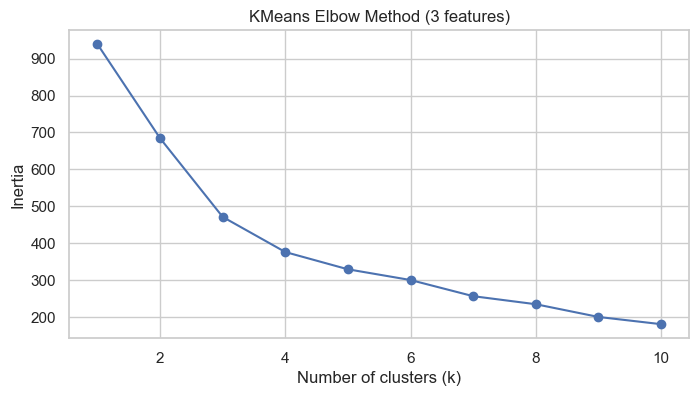

KMeans Silhouette Scores (3 features):
  k = 2: 0.2652
  k = 3: 0.3249
  k = 4: 0.3522
  k = 5: 0.3261
  k = 6: 0.3083
  k = 7: 0.3442
  k = 8: 0.3425
  k = 9: 0.3738
  k = 10: 0.3816

Adjusted Rand Index for KMeans with 3 clusters (3 features): 0.0619

Agglomerative Clustering Silhouette Scores (3 features):
  k = 2: 0.2635
  k = 3: 0.3000
  k = 4: 0.3066
  k = 5: 0.3153
  k = 6: 0.3407
  k = 7: 0.3365
  k = 8: 0.3583
  k = 9: 0.3513
  k = 10: 0.3772

Gaussian Mixture Silhouette Scores (3 features):
  k = 2: 0.2633
  k = 3: 0.3250
  k = 4: 0.2377
  k = 5: 0.1736
  k = 6: 0.2640
  k = 7: 0.2628
  k = 8: 0.1818
  k = 9: 0.3258
  k = 10: 0.3253

Spectral Clustering Silhouette Scores (3 features):
  k = 2: 0.2783
  k = 3: 0.2354
  k = 4: 0.2087
  k = 5: 0.2524
  k = 6: 0.2865
  k = 7: 0.3079
  k = 8: 0.2984
  k = 9: 0.3235
  k = 10: 0.3435


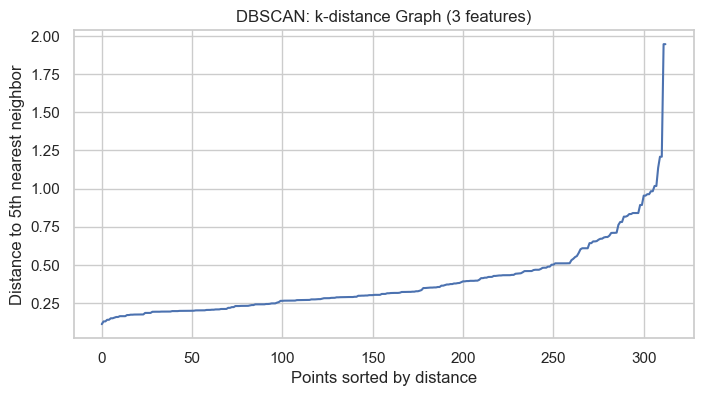


DBSCAN found clusters (3 features): [-1  0  1  2  3  4  5  6  7  8]
DBSCAN Silhouette Score (3 features): 0.2325


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing and clustering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors

# -------------------------------
# 1. Load the dataset and convert Resolution
# -------------------------------
df = pd.read_csv('master.csv')
print("Data sample:")
print(df.head())

# Assuming Resolution values are categorical and ordered: "1-2" < "2-2.5" < "2.5+"
cat_order = ["1-2", "2-2.5", "2.5+"]
df['Resolution_numeric'] = pd.Categorical(df['Resolution'], categories=cat_order, ordered=True).codes + 1
# Now "1-2" becomes 1, "2-2.5" becomes 2, and "2.5+" becomes 3

# -------------------------------
# 2. Extract features and scale them
# -------------------------------
features = ['AveragePhi', 'AveragePsi', 'Resolution_numeric']
X = df[features].values
species = df['Species'].values  # true species labels for evaluation

# Standardize the features so that all features contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 3. KMeans Clustering: Elbow Method & Silhouette Scores
# -------------------------------
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method (3 features)')
plt.show()

# Compute silhouette scores for k from 2 to 10
kmeans_sil = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    kmeans_sil[k] = score

print("KMeans Silhouette Scores (3 features):")
for k, score in kmeans_sil.items():
    print(f"  k = {k}: {score:.4f}")

# Evaluate KMeans with 3 clusters compared to the actual species using Adjusted Rand Index (ARI)
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_k3 = kmeans_3.fit_predict(X_scaled)
ari = adjusted_rand_score(species, labels_k3)
print(f"\nAdjusted Rand Index for KMeans with 3 clusters (3 features): {ari:.4f}")

# -------------------------------
# 4. Agglomerative Clustering: Silhouette Scores
# -------------------------------
agglo_sil = {}
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    agglo_sil[k] = score

print("\nAgglomerative Clustering Silhouette Scores (3 features):")
for k, score in agglo_sil.items():
    print(f"  k = {k}: {score:.4f}")

# -------------------------------
# 5. Gaussian Mixture Models (GMM): Silhouette Scores
# -------------------------------
gmm_sil = {}
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    gmm_sil[k] = score

print("\nGaussian Mixture Silhouette Scores (3 features):")
for k, score in gmm_sil.items():
    print(f"  k = {k}: {score:.4f}")

# -------------------------------
# 6. Spectral Clustering: Silhouette Scores
# -------------------------------
spectral_sil = {}
for k in range(2, 11):
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    spectral_sil[k] = score

print("\nSpectral Clustering Silhouette Scores (3 features):")
for k, score in spectral_sil.items():
    print(f"  k = {k}: {score:.4f}")

# -------------------------------
# 7. DBSCAN: k-distance Graph and Silhouette Score
# -------------------------------
# Plot the distances to the 5th nearest neighbor to help choose eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)
distances_5th = np.sort(distances[:, 4])
plt.figure(figsize=(8, 4))
plt.plot(distances_5th)
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to 5th nearest neighbor')
plt.title('DBSCAN: k-distance Graph (3 features)')
plt.show()

# Use a candidate eps value (this may need adjustment based on the graph)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
unique_labels = np.unique(dbscan_labels)
print(f"\nDBSCAN found clusters (3 features): {unique_labels}")

if len(unique_labels[unique_labels != -1]) > 0 and len(unique_labels) > 1:
    dbscan_sil = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score (3 features): {dbscan_sil:.4f}")
else:
    print("DBSCAN did not form enough clusters for silhouette score computation (3 features).")
